In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Dimensions de X: (100, 2)
Dimensions de y: (100, 1)


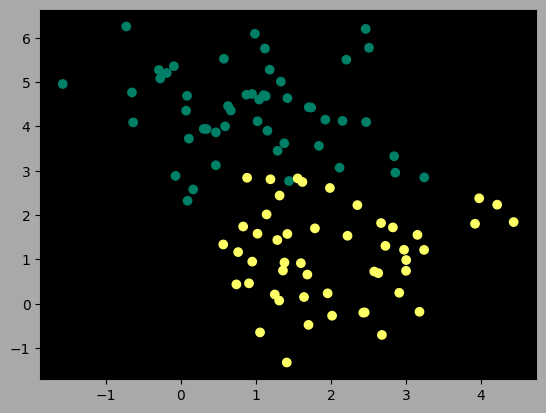

In [40]:

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('Dimensions de X:', X.shape)
print('Dimensions de y:', y.shape)

fig, ax = plt.subplots()

fig.patch.set_facecolor('darkgrey')
ax.set_facecolor('black')  

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.show()

In [41]:
def initilisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)
    

In [42]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [43]:
#Fonction coût
def log_loss(A , y):
    #len(y) = 100   
    return 1/ len(y) * np.sum(-y * np.log(A) - (1 - y ) * np.log(1 - A))

In [44]:
def gradients(A,X,y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db  = 1 / len(y) * np.sum(A - y)
    return (dW, db)


In [45]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [46]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
def artificial_neuron(X, y , learning_rate= 0.1, n_iter=100):
    # initialisation W, b
    W, b = initilisation(X)
    
    Loss = []
    
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A,y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
        
    
    y_pred = predict(X, W, b)
    print(accuracy_score(y_pred, y))
    
    plt.plot(Loss)
    plt.show()
    
    return(W,b)

0.9


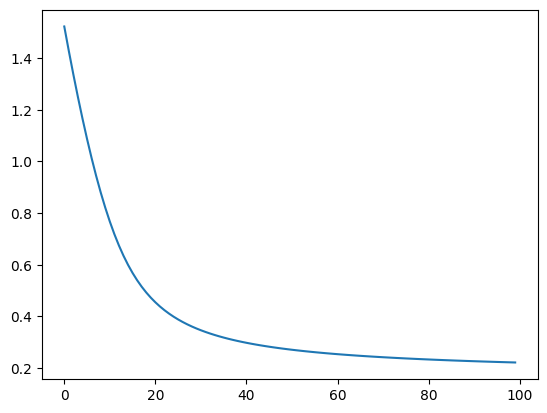

In [49]:
W , b = artificial_neuron(X, y)


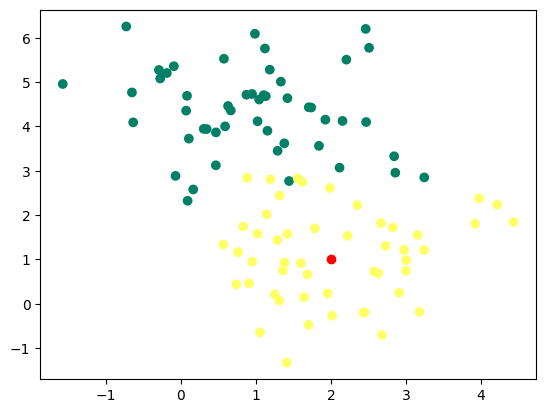

In [52]:
new_plant = np.array([2, 1])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r',)
plt.show()